# Introduction

We will create a multiindexed table with year, strategy and volumne in this notebook. First we label all datasets with the year they belong to. Then we group by year, then by "TypeTransaction" and than we aggregate by summing the volume.

In [2]:
import pandas as pd
from pandas.tseries.frequencies import to_offset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use("ggplot")



In [3]:
transaction_2016 = pd.read_csv("../data/transaction/transactions_deneigement_saison_2016-2017.csv", index_col=0)
# transaction_2017 = pd.read_csv("../data/transaction/transactions_deneigement_saison_2017-2018.csv", index_col=0)
transaction_2018 = pd.read_csv("../data/transaction/transactions_deneigement_saison_2018-2019.csv", index_col=0)
transaction_2019 = pd.read_csv("../data/transaction/transactions_deneigement_saison_2019-2020.csv", index_col=0)
transaction_2020 = pd.read_csv("../data/transaction/transactions_deneigement_saison_2020-2021.csv", index_col=0)
transaction_2021 = pd.read_csv("../data/transaction/transactions_deneigement_saison_2021-2022.csv", index_col=0)
transaction_2022 = pd.read_csv("../data/transaction/transactions_deneigement_saison_2022-2023.csv", index_col=0)

C:\Users\pcorreia\AppData\Local\Temp\ipykernel_21860\2964508961.py:1: DtypeWarning: Columns (3,13) have mixed types. Specify dtype option on import or set low_memory=False.
  transaction_2016 = pd.read_csv("../data/transaction/transactions_deneigement_saison_2016-2017.csv", index_col=0)
C:\Users\pcorreia\AppData\Local\Temp\ipykernel_21860\2964508961.py:3: DtypeWarning: Columns (3,13) have mixed types. Specify dtype option on import or set low_memory=False.
  transaction_2018 = pd.read_csv("../data/transaction/transactions_deneigement_saison_2018-2019.csv", index_col=0)


In [4]:
transaction_2016["year"] = 2016
transaction_2018["year"] = 2018
transaction_2019["year"] = 2019
transaction_2020["year"] = 2020
transaction_2021["year"] = 2021
transaction_2022["year"] = 2022

transaction_2016_final = transaction_2016[["year", "TypeTransaction", "volume"]]
transaction_2018_final = transaction_2018[["year", "TypeTransaction", "volume"]]
transaction_2019_final = transaction_2019[["year", "TypeTransaction", "volume"]]
transaction_2020_final = transaction_2020[["year", "TypeTransaction", "volume"]]
transaction_2021_final = transaction_2021[["year", "TypeTransaction", "volume"]]
transaction_2022_final = transaction_2022[["year", "TypeTransaction", "volume"]]

In [6]:
transactions = pd.concat(
    [transaction_2016_final, transaction_2018_final,
     transaction_2019_final, transaction_2020_final,
     transaction_2021_final, transaction_2022_final],
     axis=0
)
transactions

,year,TypeTransaction,volume
TransactionID,,,
375501,2016,AUT,59.64
375636,2016,AUT,28.76
375657,2016,AUT,31.34
375778,2016,AUT,59.64
375901,2016,AUT,28.76
...,...,...,...
2693533,2022,BARCODE,30.00
2693551,2022,BARCODE,30.00
2693554,2022,BARCODE,55.00


In [15]:
transactions_strategy_sum = transactions.groupby(by=["year", "TypeTransaction"])["volume"].sum()
transactions_strategy_sum = transactions_strategy_sum.reset_index()
transactions_strategy_sum

,year,TypeTransaction,volume
0,2016,AUT,12889699.02
1,2016,BARCODE,674465.00
2,2016,N-AUT,634213.73
3,2018,AUT,12610932.86
4,2018,BARCODE,776550.00
5,2018,N-AUT,654073.77
6,2019,AUT,11024209.89
7,2019,BARCODE,781800.00
8,2019,N-AUT,671295.61
9,2020,AUT,8989913.59


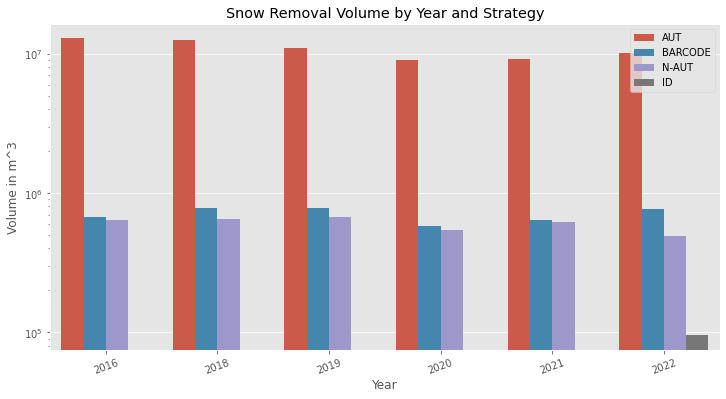

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x="year", y="volume", hue="TypeTransaction", data=transactions_strategy_sum)
plt.legend(loc="best")
plt.xticks(rotation=20)
plt.yscale("log")
plt.title("Snow Removal Volume by Year and Strategy")
plt.xlabel("Year")
plt.ylabel("Volume in m^3")
plt.show()
